# Normal modes of ball-and-spring structures

We extend the normal mode calculations from two object to an arbitrary set of objects.

Outline:

1. Create a list of point particles, all equal mass. This should be a list of equilibirium (x,y) positions.
2. Create a list of connections, all with the same spring constant. This should be a list of index pairs (i,j).
3. Construct a potential energy function in the displacment coordinates.
4. Construct the dynamical matrix.
5. Get eigenvalues and frequencies.
6. Construct a function that plots the eigenmode by index and the displacment variable t.
7. Make the plot interactive.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.html import widgets

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# A triangle
points = [(-1,-1), (1,-1), (0,1)]
connections = [(0,1), (1,2), (2,0)]
N = len(points)

In [3]:
def V(offset):
    # Offset is a vector length 2N, with x offsets followed
    # by y offsets
    V = 0
    for c in connections:
        p1 = points[c[0]]
        p2 = points[c[1]]
        x1, y1 = p1[0], p1[1]
        x2, y2 = p2[0], p2[1]
        dist_eq = math.sqrt((x1-x2)**2 + (y1-y2)**2)
        dx1 = offset[c[0]]
        dy1 = offset[c[0] + N]
        dx2 = offset[c[1]]
        dy2 = offset[c[1] + N]
        dist_new = math.sqrt(
            ((x1 + dx1) - (x2 + dx2))**2 +
            ((y1 + dy1) - (y2 + dy2))**2
        )
        V += 0.5 * (dist_new - dist_eq)**2
    return V

In [4]:
def ComputeDynamicalMatrix(points, connections):
    # This is a 2N by 2N matrix with x, followed by y
    mat = np.zeros((2*N, 2*N))
    delta = 1e-6
    for i in range(2*N):
        for j in range(2*N):
            if (i == j):
                off_f = np.zeros(2*N); off_f[i] = delta
                off_b = np.zeros(2*N); off_b[i] = -delta
                zeros = np.zeros(2*N)
                mat[i,j] = (V(off_f) - 2*V(zeros) + V(off_b))/delta**2
            else:
                off_ifjf = np.zeros(2*N); off_ifjf[i] = delta; off_ifjf[j] = delta
                off_ifjb = np.zeros(2*N); off_ifjb[i] = delta; off_ifjb[j] = -delta
                off_ibjf = np.zeros(2*N); off_ibjf[i] = -delta; off_ibjf[j] = delta;
                off_ibjb = np.zeros(2*N); off_ibjb[i] = -delta; off_ibjb[j] = -delta;
                mat[i,j] = (V(off_ifjf) - V(off_ifjb) -V(off_ibjf) + V(off_ibjb))/(2*delta)**2
    return mat

In [5]:
mat = ComputeDynamicalMatrix(points, connections)
freq, vecs = np.linalg.eig(mat)
vecs = vecs.transpose()
freq

array([  3.00000000e+00,   1.60000000e+00,   1.40000000e+00,
         4.93773589e-10,   1.60749084e-10,   2.64670809e-10])

In [6]:
def make_plot(t, n):
    x = np.array([p[0] for p in points])
    y = np.array([p[1] for p in points])
    tx = x + 0.3 * t * vecs[n][:N]
    ty = y + 0.3 * t * vecs[n][N:]
    cx, cy = [], []
    for c in connections:
        x1, y1 = tx[c[0]], ty[c[0]]
        x2, y2 = tx[c[1]], ty[c[1]]
        cx.append(x1)
        cy.append(y1)
        cx.append(x2)
        cy.append(y2)
        cx.append(None)
        cy.append(None)
    fig, ax = plt.subplots()
    plt.plot(x, y, 'r*')
    plt.plot(tx, ty, 'bo') #plot the moved points
    plt.plot(cx, cy, 'k--') #plot the streched springs
    plt.xlim(np.amin(x)-0.5, np.amax(x)+0.5)
    plt.ylim(np.amin(y)-0.5, np.amax(y)+0.5)
    plt.title("Mode %i with " % n +
        r"$\omega" + "_%i = %.3f" % (n, freq[n]) + "$")

<function __main__.make_plot>

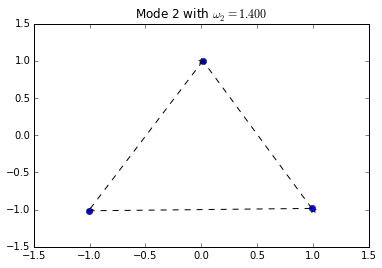

In [7]:
widgets.interact(make_plot, t=(-1.0, 1.0, 0.1), n=(0, 2*N - 1, 1))

# Examples

In [8]:
# A square with cross-reinforcements
points = [(-1,-1), (1,-1), (1,1), (-1,1)]
connections = [(0,1), (1,2), (2,3), (3,0), (0,2), (1,3)]
N = len(points)

In [9]:
mat = ComputeDynamicalMatrix(points, connections)
freq, vecs = np.linalg.eig(mat)
vecs = vecs.transpose()
freq

array([  4.00000000e+00,   4.90490403e-10,   4.89865700e-10,
         4.89864996e-10,   2.00000000e+00,   2.00000000e+00,
         2.00000000e+00,   2.00000000e+00])

<function __main__.make_plot>

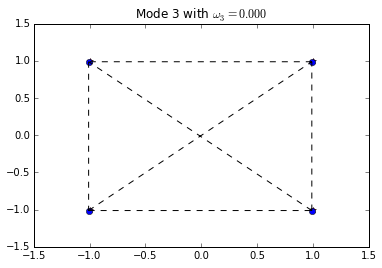

In [10]:
widgets.interact(make_plot, t=(-1.0, 1.0, 0.1), n=(0, 2*N - 1, 1))